# DA24C024

In [ ]:
from datasets import load_dataset
data = load_dataset("qanastek/MASSIVE")
#importing dataset 


In [61]:
import numpy as np
import pandas as pd

TASK 1


In [66]:
import os
import unicodedata

#function to deaccent
def deaccent(text):
    return ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')

# Locales to extract (27 Roman-script based languages)
locales = [
    'af-ZA', 'da-DK', 'de-DE', 'en-US', 'es-ES', 'fr-FR', 'fi-FI', 'hu-HU', 'is-IS', 'it-IT', 'jv-ID',
    'lv-LV', 'ms-MY', 'nb-NO', 'nl-NL', 'pl-PL', 'pt-PT', 'ro-RO', 'ru-RU', 'sl-SL', 'sv-SE', 'sq-AL',
    'sw-KE', 'tl-PH', 'tr-TR', 'vi-VN', 'cy-GB'
]


In [67]:
output_dir = "locale_files"
os.makedirs(output_dir, exist_ok=True)


In [ ]:
data_train = pd.DataFrame(data['train'])[['locale', 'partition', 'utt', 'tokens']]
data_test = pd.DataFrame(data['test'])[['locale', 'partition', 'utt', 'tokens']]
data_val=pd.DataFrame(data['validation'])[['locale', 'partition', 'utt', 'tokens']]
#making different dataframes by keeping only required columns

In [138]:
data_val

,locale,partition,utt,tokens
0,mn-MN,dev,гэрлийг унтраа,"[гэрлийг, унтраа]"
1,mn-MN,dev,үүдний өрөөний гэрлийг бүдэгрүүл,"[үүдний, өрөөний, гэрлийг, бүдэгрүүл]"
2,mn-MN,dev,өрөөг илүү харанхуй болго,"[өрөөг, илүү, харанхуй, болго]"
3,mn-MN,dev,гэр цэвэрлэ,"[гэр, цэвэрлэ]"
4,mn-MN,dev,цэвэрхэн байх сайхан шүү тоос шороо маш муу од...,"[цэвэрхэн, байх, сайхан, шүү, тоос, шороо, маш..."
...,...,...,...,...
103678,am-ET,dev,ማንኛውንም አዲስ ኢሜይሎች ሪፖርት ያድርጉ,"[ማንኛውንም, አዲስ, ኢሜይሎች, ሪፖርት, ያድርጉ]"
103679,am-ET,dev,እኔ ስንት ያልተነበቡ መልእክቶች አሉኝ,"[እኔ, ስንት, ያልተነበቡ, መልእክቶች, አሉኝ]"
103680,am-ET,dev,እባክዎን እኔ አሁን ላነበብኩት ኢሜይል ምላሽ ይስጡ,"[እባክዎን, እኔ, አሁን, ላነበብኩት, ኢሜይል, ምላሽ, ይስጡ]"
103681,am-ET,dev,ቢንያም ዛሬ ጻፈ,"[ቢንያም, ዛሬ, ጻፈ]"


In [142]:
#This function checks the locale and partition and writes them into separate files
def save_locale_data(data_df, partition, locale):


    filename = f"{locale}_{partition}.txt"
    filepath = os.path.join(output_dir, filename)
    with open(filepath, 'w', encoding='utf-8') as f:
        
        locale_data = data_df[(data_df['locale'] == locale) & (data_df['partition'] == partition)]


        for sentence in locale_data['utt']:
            sentence = deaccent(sentence)
            f.write(sentence + "\n")

for locale in locales:
    save_locale_data(data_train, 'train', locale)
    save_locale_data(data_test, 'test', locale)
    save_locale_data(data_val, 'dev', locale)

print("All files created successfully!")

All files created successfully!


# Task 2

In [143]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
data_dir = "locale_files" 

In [144]:
partitions = ['train', 'test', 'dev']
train_data = []
val_data = []
test_data = []

In [146]:
# We now read files and convert them into data frames containing only locale and uttearnce
for locale in locales:
    for partition in partitions:
        file_path = os.path.join(output_dir, f"{locale}_{partition}.txt")
        if os.path.exists(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                if partition == 'train':
                    train_data += [(locale, line.strip()) for line in lines]
                elif partition == 'dev':
                    val_data += [(locale, line.strip()) for line in lines]
                elif partition == 'test':
                    test_data += [(locale, line.strip()) for line in lines]
        else:
            print(f"Warning: File {file_path} does not exist!")

train_df = pd.DataFrame(train_data, columns=['locale', 'utt'])
val_df = pd.DataFrame(val_data, columns=['locale', 'utt'])
test_df = pd.DataFrame(test_data, columns=['locale', 'utt'])

In [147]:
val_df

,locale,utt
0,af-ZA,skakel die ligte af asseblief
1,af-ZA,verdof die ligte in die gang
2,af-ZA,maak die vertrek donkerder
3,af-ZA,maak die woonstel skoon
4,af-ZA,skoonmaak is goed stof is so sleg doen nou jou...
...,...,...
109777,cy-GB,adroddwch unrhyw e-byst newydd
109778,cy-GB,sawl neges heb eu darllen sydd gennyf i
109779,cy-GB,ymateb i'r ebost dw'i newydd derbyn
109780,cy-GB,wnaeth bert ysgrifennu ataf i heddiw


In [148]:
X_train, y_train = train_df['utt'], train_df['locale']
X_val, y_val = val_df['utt'], val_df['locale']
X_test, y_test = test_df['utt'], test_df['locale']


In [149]:
test_df.tail()

,locale,utt
160591,cy-GB,mae fy ffrind john wedi danfon gwahoddiad ataf...
160592,cy-GB,gwiria fy ebost am unrhyw ebost newydd wrth joe
160593,cy-GB,a oes gennyf unrhyw ebost newydd oddi wrth jac
160594,cy-GB,hysbysa fi pan fod arwel yn fy ebostio fi
160595,cy-GB,ydy john wedi anfon ebost i fi


In [150]:

pipeline = make_pipeline(CountVectorizer(), MultinomialNB())
#for cross val
param_grid = {
    'multinomialnb__alpha': [0.1, 0.5, 1.0, 2.0, 5.0],  #alphas
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],  #ngrams

}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'countvectorizer__ngram_range': (1, 2), 'multinomialnb__alpha': 0.1}


In [151]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:

def print_metrics(y_true, y_pred, partition_name):
    print(f"Performance on {partition_name} set:")
    print("Accuracy:", metrics.accuracy_score(y_true, y_pred))
    print("Precision:", metrics.precision_score(y_true, y_pred, average='macro'))
    print("Recall:", metrics.recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", metrics.f1_score(y_true, y_pred, average='macro'))
    print(metrics.classification_report(y_true, y_pred, target_names=locales))
    print("\n")
    cm = confusion_matrix(y_true, y_pred, labels=locales)
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=locales, yticklabels=locales)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {partition_name} Set')
    plt.show()


Performance on training set:
Accuracy: 0.9944930165531173
Precision: 0.9944976034175481
Recall: 0.9944930165531174
F1 Score: 0.994492272096066
              precision    recall  f1-score   support

       af-ZA       0.98      0.99      0.99     23028
       da-DK       1.00      1.00      1.00     23028
       de-DE       0.98      0.98      0.98     23028
       en-US       1.00      1.00      1.00     23028
       es-ES       0.99      1.00      0.99     23028
       fr-FR       0.99      0.99      0.99     23028
       fi-FI       1.00      1.00      1.00     23028
       hu-HU       1.00      0.99      1.00     23028
       is-IS       1.00      1.00      1.00     23028
       it-IT       1.00      1.00      1.00     23028
       jv-ID       0.99      1.00      1.00     23028
       lv-LV       1.00      0.99      1.00     23028
       ms-MY       1.00      1.00      1.00     23028
       nb-NO       0.99      1.00      1.00     23028
       nl-NL       0.98      0.98      0.98   

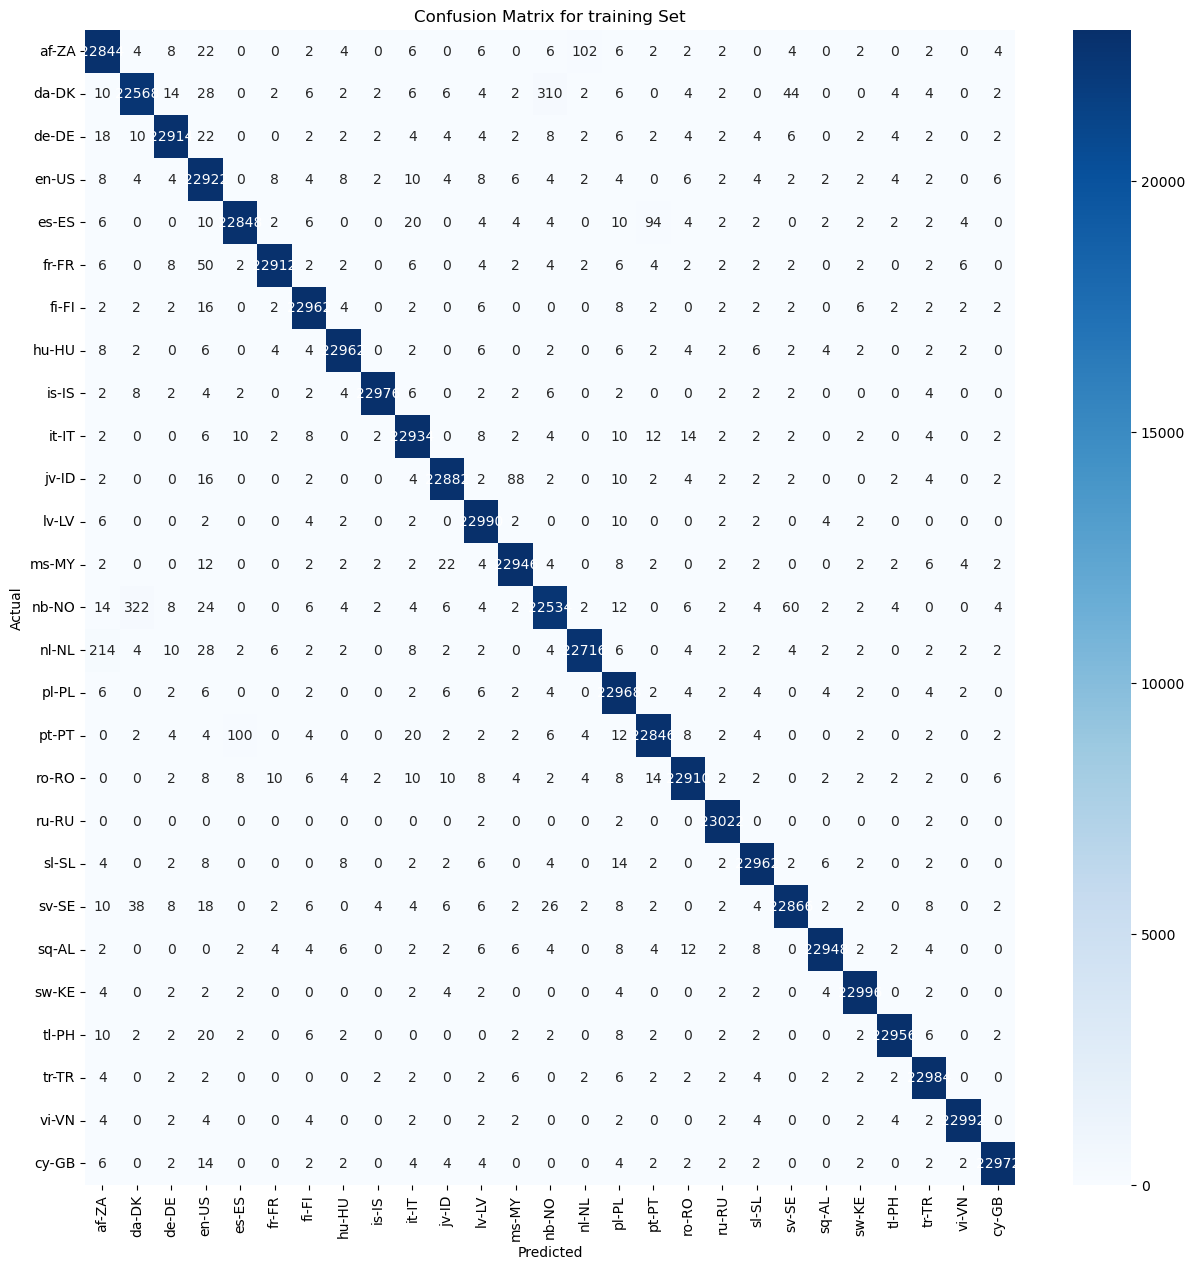

In [153]:
# Predict and evaluate on the training set
train_pred = grid_search.predict(X_train)
print_metrics(y_train, train_pred, "training")



Performance on validation set:
Accuracy: 0.984751598622725
Precision: 0.9850526160704379
Recall: 0.984751598622725
F1 Score: 0.9848279455889165
              precision    recall  f1-score   support

       af-ZA       0.91      0.98      0.94      4066
       da-DK       1.00      0.99      0.99      4066
       de-DE       0.95      0.96      0.95      4066
       en-US       1.00      0.98      0.99      4066
       es-ES       0.97      0.99      0.98      4066
       fr-FR       0.98      0.98      0.98      4066
       fi-FI       0.99      0.99      0.99      4066
       hu-HU       0.99      0.99      0.99      4066
       is-IS       1.00      0.98      0.99      4066
       it-IT       1.00      0.99      0.99      4066
       jv-ID       0.99      0.99      0.99      4066
       lv-LV       0.99      0.99      0.99      4066
       ms-MY       1.00      0.99      0.99      4066
       nb-NO       0.99      0.99      0.99      4066
       nl-NL       0.97      0.95      0.96  

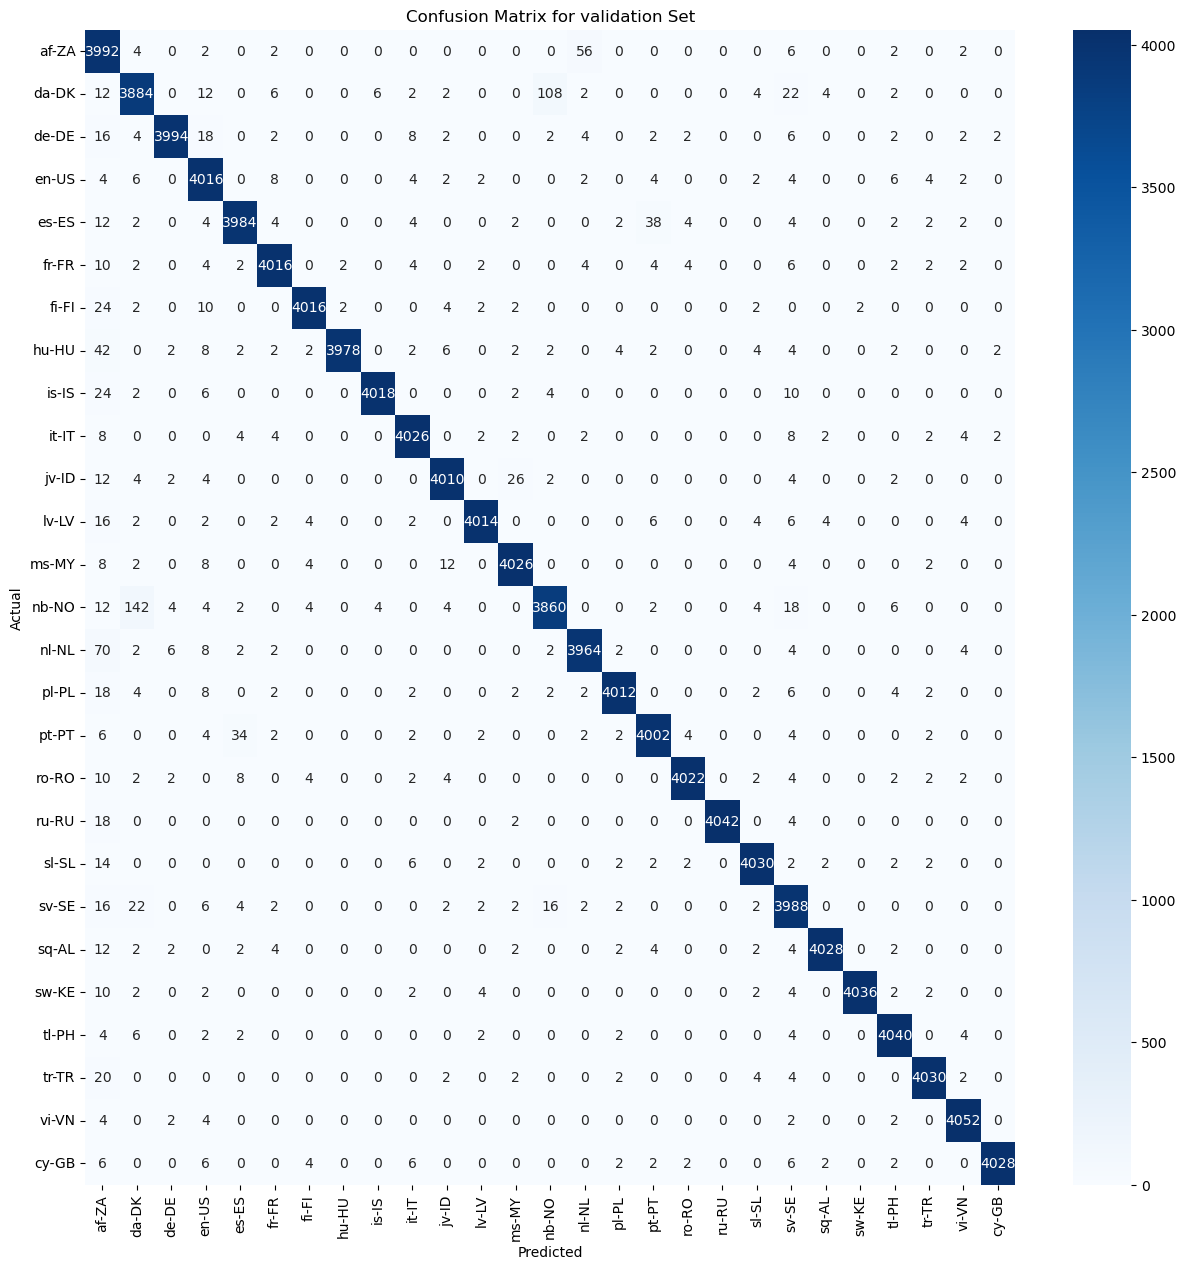

In [154]:
# Predict and evaluate on the validation set
val_pred = grid_search.predict(X_val)
print_metrics(y_val, val_pred, "validation")


Performance on test set:
Accuracy: 0.9844703479538718
Precision: 0.9849059945460076
Recall: 0.984470347953872
F1 Score: 0.9845693905963231
              precision    recall  f1-score   support

       af-ZA       0.89      0.99      0.94      5948
       da-DK       1.00      0.99      1.00      5948
       de-DE       0.95      0.96      0.95      5948
       en-US       1.00      0.99      0.99      5948
       es-ES       0.96      0.99      0.97      5948
       fr-FR       0.97      0.98      0.98      5948
       fi-FI       0.99      0.99      0.99      5948
       hu-HU       0.99      0.99      0.99      5948
       is-IS       1.00      0.98      0.99      5948
       it-IT       1.00      0.99      0.99      5948
       jv-ID       0.99      0.99      0.99      5948
       lv-LV       0.98      0.98      0.98      5948
       ms-MY       0.99      0.99      0.99      5948
       nb-NO       0.99      0.99      0.99      5948
       nl-NL       0.96      0.94      0.95      5

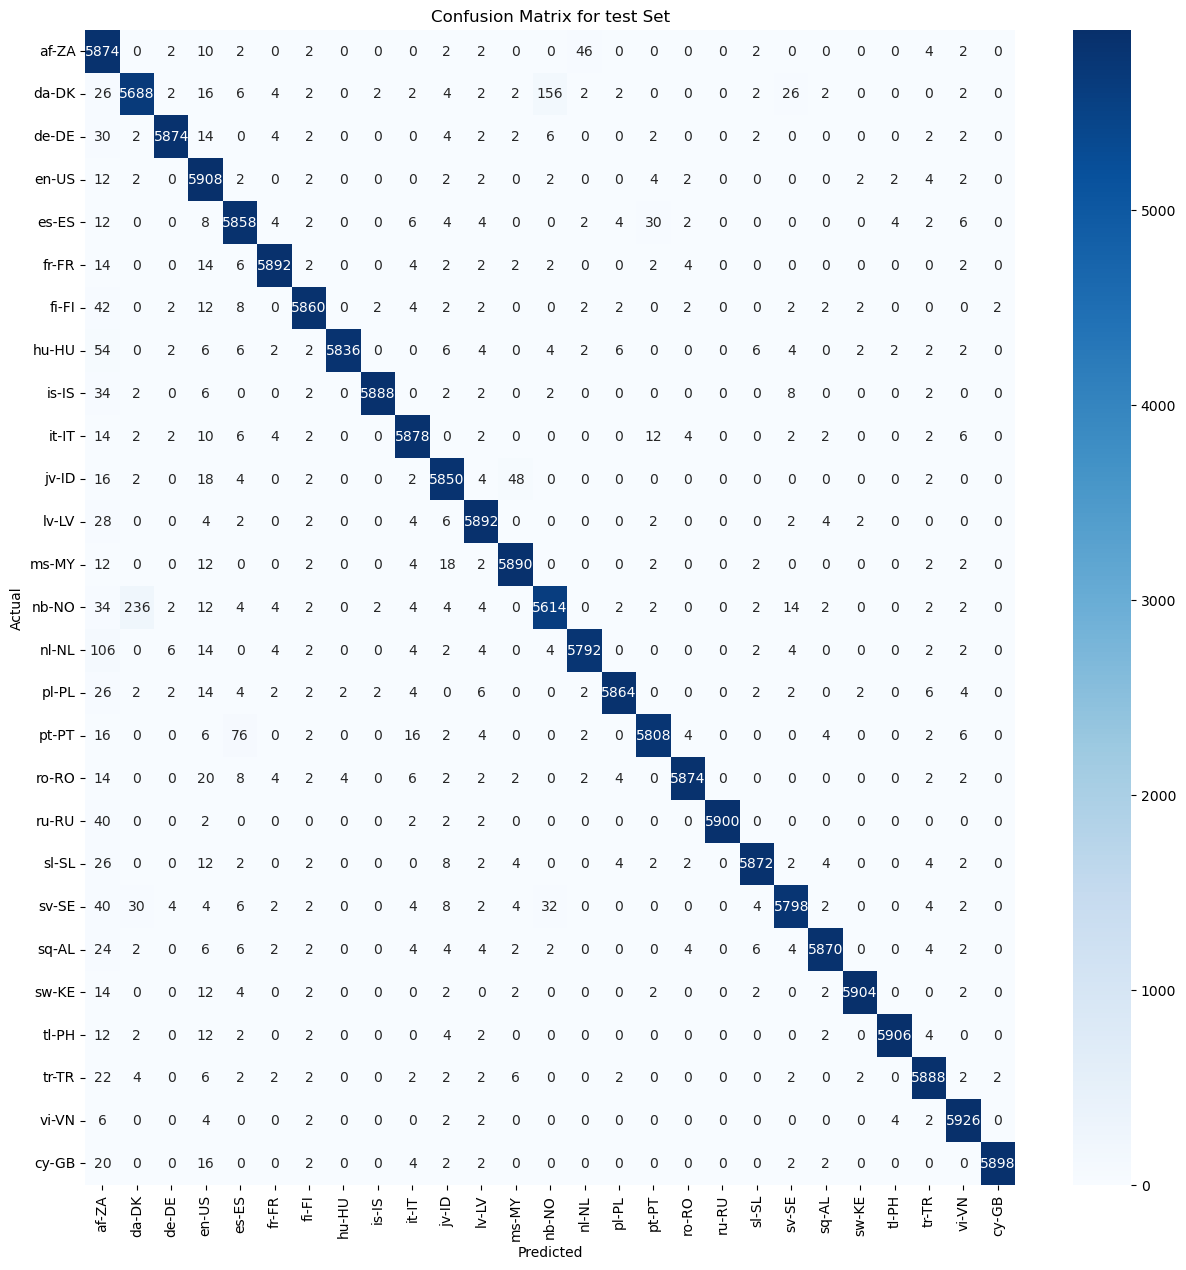

In [155]:
# Predict and evaluate on the test set
test_pred = grid_search.predict(X_test)
print_metrics(y_test, test_pred, "test")

SO training, validation and test set accuracies are 99.4, 98.4 and 98.4 respectively

# TASK 3

In [193]:

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.decomposition import TruncatedSVD
from sklearn.utils import check_X_y
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import linalg

# here we map the locales and their respective continent groups
continent_groups = {
    'Asia': ['jv-ID', 'ms-MY', 'tl-PH', 'tr-TR', 'vi-VN'],
    'Africa': ['af-ZA', 'sw-KE'],
    'Europe': ['da-DK', 'de-DE', 'en-US', 'es-ES', 'fr-FR', 'fi-FI', 'hu-HU', 'is-IS', 'it-IT', 'lv-LV', 'nb-NO', 'nl-NL', 'pl-PL', 'pt-PT', 'ro-RO', 'ru-RU', 'sl-SL', 'sv-SE', 'sq-AL', 'cy-GB'],
    'North_America': ['en-US']
}

data_dir = output_dir 



In [194]:
#this combines data from files by continent
def combine_data_by_continent(data_dir, continent_groups, partition):
    data = []
    for continent, locales in continent_groups.items():
        for locale in locales:
            file_path = os.path.join(data_dir, f"{locale}_{partition}.txt")
            if os.path.exists(file_path):
                with open(file_path, 'r', encoding='utf-8') as file:
                    lines = file.readlines()
                    data += [(continent, line.strip()) for line in lines]
            else:
                print(f"Warning: File {file_path} does not exist!")
    df = pd.DataFrame(data, columns=['continent', 'utt'])
    return df

#converting to dataframe
df_train = combine_data_by_continent(data_dir, continent_groups, 'train')
df_val = combine_data_by_continent(data_dir, continent_groups, 'dev')
df_test = combine_data_by_continent(data_dir, continent_groups, 'test')


In [195]:

#shape of each frame
print(f"Training Data: {df_train.shape}")
print(f"Validation Data: {df_val.shape}")
print(f"Testing Data: {df_test.shape}")



Training Data: (322392, 2)
Validation Data: (56924, 2)
Testing Data: (83272, 2)


In [227]:
X_train, y_train = df_train.drop(columns='continent'), df_train['continent']
X_val, y_val = df_val.drop(columns='continent'), df_val['continent']
X_test, y_test = df_test.drop(columns='continent'), df_test['continent']


In [247]:
encoder=LabelEncoder()
y_train,y_val,y_test=encoder.fit_transform(y_train),encoder.fit_transform(y_val),encoder.fit_transform(y_test)


In [198]:
#TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(df_train['utt'])
X_val = vectorizer.transform(df_val['utt'])
X_test = vectorizer.transform(df_test['utt'])


In [199]:
#Since the matrix is sparse, we reduce it's dimensionality using SVD
svd=TruncatedSVD(n_components=200)
X_train_reduced = svd.fit_transform(X_train)
X_val_reduced = svd.fit_transform(X_val)
X_test_reduced = svd.fit_transform(X_test)


In [263]:

# Regularized Discriminant Analysis 
class RDA(BaseEstimator, ClassifierMixin):
    def __init__(self, regularization_coefficient=0.5):
        self.regularization_coefficient = regularization_coefficient
        self.lda = LinearDiscriminantAnalysis()
        self.qda = QuadraticDiscriminantAnalysis()

    def fit(self, features, labels):
        features, labels = check_X_y(features, labels)

       
        # Training
        self.lda.fit(features, self.encoded_labels)
        self.qda.fit(features, self.encoded_labels)

        return self

    def predict(self, features):
        check_is_fitted(self, ['lda', 'qda'])

        lda_probabilities = self.lda.predict_proba(features)
        qda_probabilities = self.qda.predict_proba(features)

        # Combining likelihoods
        combined_likelihoods = (1 - self.regularization_coefficient) * np.log(lda_probabilities + 1e-10) + \
                               self.regularization_coefficient * np.log(qda_probabilities + 1e-10)

        return self.encoder.inverse_transform(np.argmax(combined_likelihoods, axis=1))

    def optimize_lambda(self, features, labels):
        param_grid = {'regularization_coefficient': np.arange(0, 1, 0.1)}
        grid_search = GridSearchCV(self, param_grid, scoring='accuracy')
        grid_search.fit(features, labels)
        return grid_search.best_estimator_, grid_search.best_params_['regularization_coefficient']




In [265]:

rda = RDA()
rda.fit(X_train_reduced, y_train)



RDA()

In [ ]:
optimal_model, optimal_lambda = rda.optimize_lambda(X_val_reduced, y_val)

In [272]:
predictions = optimal_model.predict(X_test_reduced)

In [277]:
acc=accuracy_score(predictions,y_test)

In [278]:
print("accuracy is:",acc)

accuracy is: 0.9255564654209781


So we get an accuracy of 92% using RDA